In [1]:
from input_lambda_svmm import SVMM, plot_SVMM
from pandas import read_csv
from scipy.stats import geom, norm, multinomial
from scipy import special
import matplotlib.pyplot as plt 
import numpy as np
from joblib import Parallel, delayed
import random

In [2]:
def theta_to_data(N, pi, alpha, lambda_, mu_2, sigma):

    draws = multinomial.rvs(n = N, p = pi)
    draws_alpha = multinomial.rvs(n = draws[0], p = [alpha, 1 - alpha])

    X = [0 for _ in range(draws_alpha[0])]
    X_l = geom.rvs(1/lambda_, size = draws_alpha[1])
    X_g = norm.rvs(mu_2, sigma[0], size = draws[1])
    X_g2 = norm.rvs(2 * mu_2, sigma[1], size = draws[2])

    while sum(X_g < -0.5) > 0:
        X_g_new = norm.rvs(mu_2, sigma[0], size = sum(X_g < -0.5))
        X_g = [x for x in X_g if x >= -0.5]
        X_g = np.concatenate((X_g, X_g_new))

    while sum(X_g2 < -0.5) > 0:
        X_g2_new = norm.rvs(2 * mu_2, sigma[1], size = sum(X_g2 < -0.5))
        X_g2 = [x for x in X_g2 if x >= -0.5]
        X_g2 = np.concatenate((X_g2, X_g2_new))

    X = np.concatenate((X,X_l))
    X = np.concatenate((X,X_g))
    X = np.concatenate((X,X_g2))
    X = np.round(X).astype(int)

    return X

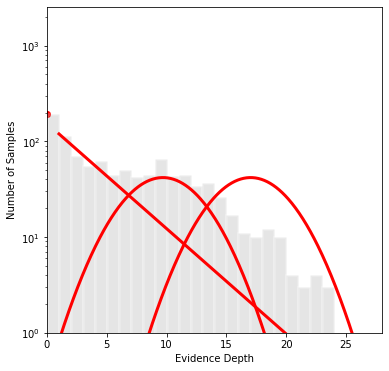

(array([0.6081212 , 0.32531408, 0.06656471]),
 0.31849154972445554,
 3.949788338307448,
 array([ 9.69113848, 17.02684316]),
 [3.1028357554362445, 3.3526337478289703])

In [4]:
N = 1000
pi = [1/3, 1/3, 1/3]
alpha = 0.5
lambda_ = 2
mu_2 = 5
sigma = [5, 5]

X_gen = theta_to_data(N, pi, alpha, lambda_, mu_2, sigma)
SVMM(X_gen, lambda_, True, False)